In [2]:
import scipy
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import os, sys
import math
import csv

In [41]:
masterFolder = os.fspath("D:\\Image Files\\")
subFolders = [os.path.join(masterFolder, subFolder) for subFolder in os.listdir(masterFolder) if "GER24" in subFolder]
print(subFolders)

['D:\\Image Files\\C103 MR Het GER24xSox2Cre', 'D:\\Image Files\\C201 FR Het GER24xSox2Cre', 'D:\\Image Files\\C202 FL WT GER24xSox2Cre', 'D:\\Image Files\\C203 FB Het GER24xSox2Cre', 'D:\\Image Files\\C205 MR Het GER24xSox2Cre', 'D:\\Image Files\\C206 ML WT GER24xSox2Cre', 'D:\\Image Files\\C207 MB Het GER24xSox2Cre']


In [24]:
currentFolder = subFolders[0]
keyName = ""
filePathList = [os.path.join(currentFolder, fileName) for fileName in os.listdir(currentFolder) if keyName in fileName.lower()]
fileList = [fileName[:-4] for fileName in os.listdir(currentFolder) if keyName in fileName.lower()]
print(fileList)

['C203 FB Het GER24xSox2Cre - Adrenal', 'C203 FB Het GER24xSox2Cre - Bladder', 'C203 FB Het GER24xSox2Cre - Diaphragm', 'C203 FB Het GER24xSox2Cre - Eyes', 'C203 FB Het GER24xSox2Cre - Gastrocnemius Muscle', 'C203 FB Het GER24xSox2Cre - Heart', 'C203 FB Het GER24xSox2Cre - Kidney', 'C203 FB Het GER24xSox2Cre - Large Intestine', 'C203 FB Het GER24xSox2Cre - Liver', 'C203 FB Het GER24xSox2Cre - Lung', 'C203 FB Het GER24xSox2Cre - Lymph Node', 'C203 FB Het GER24xSox2Cre - Ovary', 'C203 FB Het GER24xSox2Cre - Pancreas', 'C203 FB Het GER24xSox2Cre - Skin', 'C203 FB Het GER24xSox2Cre - Small Intestine', 'C203 FB Het GER24xSox2Cre - Spleen', 'C203 FB Het GER24xSox2Cre - Stomach', 'C203 FB Het GER24xSox2Cre - Thymus', 'C203 FB Het GER24xSox2Cre - Uterus']


In [26]:
currentNum = 4
currentFilePath = filePathList[currentNum]
currentFile = fileList[currentNum]
print(currentFile)

C203 FB Het GER24xSox2Cre - Gastrocnemius Muscle


In [27]:
img = ski.io.imread(currentFilePath)
print(img.shape)
print(img.dtype)
imgDAPI = img[:,:,1]
imgRFP = img[:,:,0]

(2048, 2048, 3)
uint16


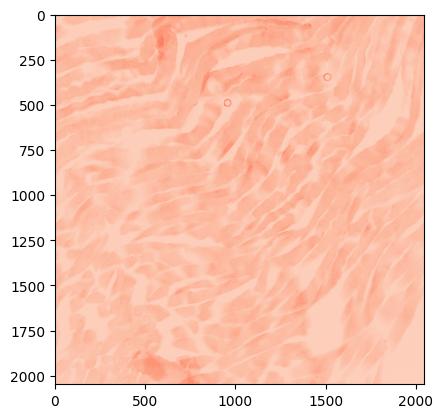

In [28]:
fig, ax = plt.subplots()
plt.imshow(imgRFP, cmap="Reds")

C:\Users\savile\AppData\Local\Temp\ipykernel_21000\3368943341.py:8: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(croppedImgRFP, cmap="Reds")
C:\Users\savile\AppData\Local\Temp\ipykernel_21000\3368943341.py:8: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(croppedImgRFP, cmap="Reds")


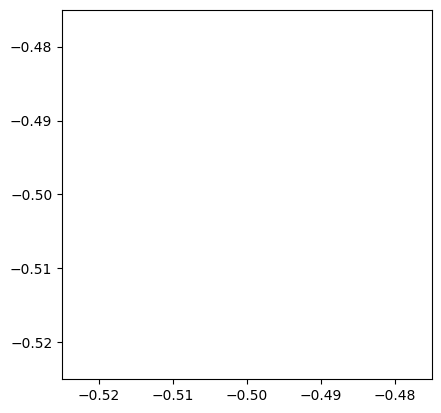

In [10]:
xStart = 6750
yStart = 4000
size = 2048
croppedImg = img[:,yStart:yStart+size,xStart:xStart+size]
croppedImgRFP = croppedImg[0,:,:]
croppedImgDAPI = croppedImg[1,:,:]
fig, ax = plt.subplots()
plt.imshow(croppedImgRFP, cmap="Reds")

In [32]:
#Find background peak
histogram, bin_edges = np.histogram(imgRFP, bins=65536, range=(0,65536))
peaksRFP = scipy.signal.find_peaks(histogram, prominence=5000)
print(peaksRFP)

(array([109, 140]), {'prominences': array([68746., 12526.]), 'left_bases': array([ 32, 119]), 'right_bases': array([319, 319])})


[]
4081


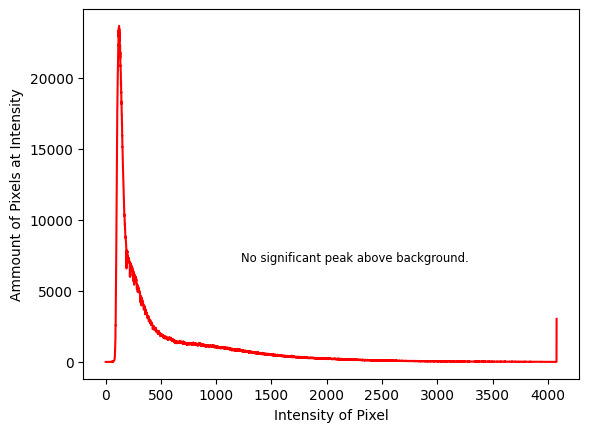

In [45]:
histogram, bin_edges = np.histogram(imgRFP, bins=65536, range=(0,65536))
peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
print(peaksRFP[0])
if peaksRFP[0].size == 0:
    trimmedHistogram = np.trim_zeros(histogram[1:])
    plt.xlabel("Intensity of Pixel")
    plt.ylabel("Ammount of Pixels at Intensity")
    plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
    ax = plt.gca()
    # rightCut = math.floor(peaksRFP[0][-1] - peaksRFP[1]['left_bases'][-1]+peaksRFP[0][-1])
    labelPeak = "No significant peak above background."
    ax.annotate(labelPeak, xy=(trimmedHistogram.size*0.3, np.amax(histogram[1:])*0.5), xytext=(trimmedHistogram.size*0.3, np.amax(histogram[1:])*0.3), fontsize="small")
                    # arrowprops=dict(facecolor='black', shrink=0.05),
                    # )
else:
    peak = peaksRFP[0][-1]
    trimmedHistogram = np.trim_zeros(histogram[1:])
    plt.xlabel("Intensity of Pixel")
    plt.ylabel("Ammount of Pixels at Intensity")
    plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
    ax = plt.gca()
    rightCut = math.floor(peaksRFP[0][-1] - peaksRFP[1]['left_bases'][-1]+peaksRFP[0][-1])
    labelPeak = "Peak: "+str(peak)+"\nHeight: "+str(histogram[peak])+"\nRight Cutoff: "+str(rightCut)
    ax.annotate(labelPeak, xy=(peak, histogram[peak]), xytext=(trimmedHistogram.size*0.7, np.amax(histogram[1:])*0.8), fontsize="small")
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    )

print(trimmedHistogram.size)

In [13]:
plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
ax = plt.gca()
ax.set_xlim([0, trimmedHistogram.size])
ax.set_ylim([0,np.amax(histogram[1:])])
peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
if(len(peaksRFP[0]) > 0):
    peak = peaksRFP[0][-1]
    rightCut = math.floor(peaksRFP[0][-1] - peaksRFP[1]['left_bases'][-1]+peaksRFP[0][-1])
    labelPeak = "Peak: "+str(peak)+"\nHeight: "+str(histogram[peak])+"\nRight Cutoff: "+str(rightCut)
    ax.annotate(labelPeak, xy=(peak, histogram[peak]), xytext=(trimmedHistogram.size*0.7, np.amax(histogram[1:])*0.8), fontsize="small")
    plt.suptitle(currentFile+" X:"+str(xStart)+" Y:"+str(yStart), fontsize='small')
    figureFile = currentFile+".png"
    plt.savefig(figureFile)
    plt.close()
    print(currentFile)
else:
    print(currentFile)

C103 MR Het GER24xSox2Cre - Heart


In [43]:
for folder in subFolders:
    fileList = [fileName for fileName in os.listdir(folder) if "ger" in fileName.lower()]
    for file in fileList:
        filePath = os.path.join(folder, file)
        img = ski.io.imread(filePath)
        imgDAPI = img[:,:,1]
        imgRFP = img[:,:,0]
        histogram, bin_edges = np.histogram(imgRFP, bins=65536, range=(0,65536))
        trimmedHistogram = np.trim_zeros(histogram[1:])
        plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
        ax = plt.gca()
        ax.set_xlim([0, trimmedHistogram.size])
        ax.set_ylim([0,np.amax(histogram[1:])])
        peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
        plt.xlabel("Intensity of Pixel")
        plt.ylabel("Ammount of Pixels at Intensity")
        if(len(peaksRFP[0]) > 0):
            # peak = peaksRFP[0][-1]
            # rightCut = math.floor(peaksRFP[0][-1] - peaksRFP[1]['left_bases'][-1]+peaksRFP[0][-1])
            # labelPeak = "Peak: "+str(peak)+"\nHeight: "+str(histogram[peak])+"\nRight Cutoff: "+str(rightCut)
            # ax.annotate(labelPeak, xy=(peak, histogram[peak]), xytext=(trimmedHistogram.size*0.6, np.amax(histogram[1:])*0.8), fontsize="small")
            # plt.suptitle(file[:-4], fontsize='small')
            # figureFile = file[:-4]+".png"
            # plt.savefig(figureFile)
            plt.close()
            print("Peaks significant: "+file+"Highest Signal at: "+str(trimmedHistogram.size))
        else:
            # plt.plot(bin_edges[:len(trimmedHistogram)], trimmedHistogram, color="red")
            # labelPeak = "No significant peak above background."
            # ax.annotate(labelPeak, xy=(trimmedHistogram.size*0.3, np.amax(histogram[1:])*0.5), xytext=(trimmedHistogram.size*0.3, np.amax(histogram[1:])*0.3), fontsize="small")
            # plt.suptitle(file[:-4], fontsize='small')
            # figureFile = file[:-4]+".png"
            # plt.savefig(figureFile)
            plt.close()
            print("Peaks not significant: "+file+"Highest Signal at: "+str(trimmedHistogram.size))

Peaks significant: C103 MR Het GER24xSox2Cre - Adrenal Gland.tifHighest Signal at: 4063
Peaks significant: C103 MR Het GER24xSox2Cre - Bladder.tifHighest Signal at: 4065
Peaks not significant: C103 MR Het GER24xSox2Cre - Diaphragm.tifHighest Signal at: 4087
Peaks not significant: C103 MR Het GER24xSox2Cre - Epididymis.tifHighest Signal at: 4084
Peaks significant: C103 MR Het GER24xSox2Cre - Eye.tifHighest Signal at: 4081
Peaks significant: C103 MR Het GER24xSox2Cre - Gastrocnemius Muscle.tifHighest Signal at: 3990
Peaks significant: C103 MR Het GER24xSox2Cre - Heart.tifHighest Signal at: 3979
Peaks significant: C103 MR Het GER24xSox2Cre - Kidney.tifHighest Signal at: 4063
Peaks significant: C103 MR Het GER24xSox2Cre - Large Intestine.tifHighest Signal at: 4079
Peaks significant: C103 MR Het GER24xSox2Cre - Liver.tifHighest Signal at: 4034
Peaks significant: C103 MR Het GER24xSox2Cre - Lung.tifHighest Signal at: 4059
Peaks significant: C103 MR Het GER24xSox2Cre - Lymph Node.tifHighest S

In [14]:
peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
print(peaksRFP)

(array([ 248, 2210]), {'prominences': array([286247.,  26629.]), 'left_bases': array([ 78, 764]), 'right_bases': array([3956, 3956]), 'widths': array([ 137.0200916, 1103.244116 ]), 'width_heights': array([144005.5,  16036.5]), 'left_ips': array([ 197.98024831, 1703.0872093 ]), 'right_ips': array([ 335.0003399, 2806.3313253])})


764
3656
2947
1858


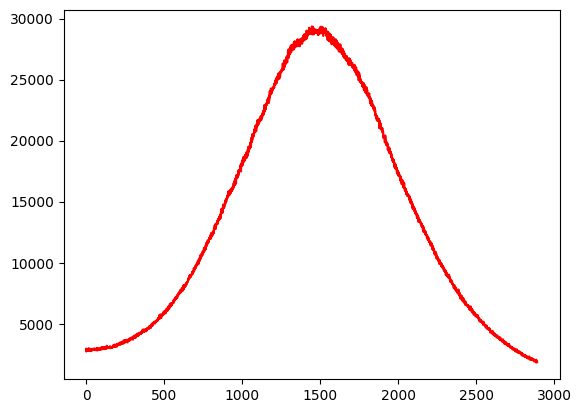

In [15]:
if peaksRFP[1]['left_bases'][1] == peaksRFP[1]['left_bases'][0]:
    leftCut = math.floor(peaksRFP[1]['right_bases'][0])
else:
    leftCut = math.floor(peaksRFP[1]['left_bases'][-1])
print(leftCut)
rightCut = math.floor(peaksRFP[0][-1] - peaksRFP[1]['left_bases'][-1]+peaksRFP[0][-1])
print(rightCut)
width = rightCut-leftCut
lowerThreshold = leftCut
higherThreshold = rightCut
# print(histogram[leftCut:rightCut])
plt.plot(bin_edges[0:width], histogram[leftCut:rightCut], color="red")
print(histogram[leftCut])
print(histogram[rightCut])

In [21]:
thresholdList = [['File Name', 'Lower Threshold', 'Higher Threshold', 'Peak', 'Width']]
for folder in subFolders:
    fileList = [os.path.join(folder, fileName) for fileName in os.listdir(folder)]# if "liver" in fileName.lower()]
    for file in fileList:
        img = ski.io.imread(file)
        imgDAPI = img[1,:,:]
        imgRFP = img[0,:,:]
        histogram, bin_edges = np.histogram(imgRFP, bins=65536, range=(0,65536))
        peaksRFP = scipy.signal.find_peaks(histogram[1:-1], width=100, distance=100)
        if(len(peaksRFP[0]) > 0):
            if(len(peaksRFP[0]) > 1):
                if peaksRFP[1]['left_bases'][1] == peaksRFP[1]['left_bases'][0]:
                    leftCut = math.floor(peaksRFP[1]['right_bases'][0])
                else:
                    leftCut = math.floor(peaksRFP[1]['left_bases'][-1])
            else:
                leftCut = math.floor(peaksRFP[1]['left_bases'][-1])
            rightCut = math.floor(peaksRFP[0][-1] - peaksRFP[1]['left_bases'][-1]+peaksRFP[0][-1])
            width = rightCut-leftCut
            lowerThreshold = leftCut
            higherThreshold = rightCut
            print(file, "Lower: ", lowerThreshold, " Higher: ", higherThreshold, "Peak:", peaksRFP[0][-1], "\n")
            print(peaksRFP, "\n")
            thresholdList.append([file, lowerThreshold, higherThreshold, peaksRFP[0][-1], width])
        else:
            print(file, "\n No Peaks Found \n")

D:\Image Files\TLR2_1824_Edited_LSBio_Microscopy\TLR2_1824_Edited - LSBio Kidney.tif Lower:  582  Higher:  2490 Peak: 1536 

(array([1536]), {'prominences': array([47539.]), 'left_bases': array([582]), 'right_bases': array([3942]), 'widths': array([939.27130116]), 'width_heights': array([38259.5]), 'left_ips': array([1024.44320988]), 'right_ips': array([1963.71451104])}) 

D:\Image Files\TLR2_1824_Edited_LSBio_Microscopy\TLR2_1824_Edited - LSBio Liver.tif Lower:  764  Higher:  3656 Peak: 2210 

(array([ 248, 2210]), {'prominences': array([286247.,  26629.]), 'left_bases': array([ 78, 764]), 'right_bases': array([3956, 3956]), 'widths': array([ 137.0200916, 1103.244116 ]), 'width_heights': array([144005.5,  16036.5]), 'left_ips': array([ 197.98024831, 1703.0872093 ]), 'right_ips': array([ 335.0003399, 2806.3313253])}) 

D:\Image Files\TLR2_1824_Edited_LSBio_Microscopy\TLR2_1824_Edited - LSBio Pancreas.tif Lower:  439  Higher:  1515 Peak: 977 

(array([977]), {'prominences': array([11547

In [74]:
csvFileName = "threshold_output.csv"
with open(csvFileName, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(thresholdList[0])
    csvwriter.writerows(thresholdList[1:])